Здесь реализовано чтение данных с фотометра и отправление команд на ардуино с мотором для вращения ручки фотометра.

In [ ]:
import pandas as pd
import numpy as np
import serial
import struct
import sys
import matplotlib.pyplot as plt
import time

In [ ]:
def serial_ports():
    """ Lists serial port names
    
        :raises EnvironmentError:
            On unsupported or unknown platforms
        :returns:
            A list of the serial ports available on the system
    """
    if sys.platform.startswith('win'):
        ports = ['COM%s' % (i + 1) for i in range(256)]
    elif sys.platform.startswith('linux') or sys.platform.startswith('cygwin'):
        # this excludes your current terminal "/dev/tty"
        ports = glob.glob('/dev/tty[A-Za-z]*')
    elif sys.platform.startswith('darwin'):
        ports = glob.glob('/dev/tty.*')
    else:
        raise EnvironmentError('Unsupported platform')
  
    result = []
    for port in ports:
        try:
            s = serial.Serial(port)
            s.close()
            result.append(port)
        except (OSError, serial.SerialException):
            pass
    return result

In [ ]:
## Задаётся глубина измерений и шаг (в нм)
measurementDepth = 100
stepSize = 1

serPhotometer = serial.Serial(serial_ports()[1], 19200)
time.sleep(1)
serMotor = serial.Serial(serial_ports()[0], 9600)

numberOfTurns = 10

time.sleep(2)
wave_length_and_tau = {}

waveLength = 0
while waveLength < 500:
    serMotor.write(b'g')
    time.sleep(7)
    waveLength = 0
    tau = 0
    while waveLength == 0 or tau == 0:
        time.sleep(0.1)
        serin = serPhotometer.read()
        if serin == b'\xaa':
            serin = serPhotometer.read(9)
            if len(serin) != 9:
                continue
            if serin[3:4] == b'\x07':
                waveLength = struct.unpack('f', serin[4:8])[0]
            else:
                tau = struct.unpack('f', serin[4:8])[0]
            serPhotometer.flushInput()
    print(f'waveLength = {waveLength} and tau = {tau}\n')
    wave_length_and_tau[waveLength] = tau

serPhotometer.close()
serMotor.close()

waveLength = 357.8999938964844 and tau = 5.6426568031311035

waveLength = 365.79998779296875 and tau = 7.655120849609375

waveLength = 373.5 and tau = 9.593727111816406

waveLength = 381.20001220703125 and tau = 8.014671325683594

waveLength = 388.8999938964844 and tau = 14.430326461791992

waveLength = 396.70001220703125 and tau = 38.54482650756836

waveLength = 404.6000061035156 and tau = 64.59781646728516

waveLength = 412.1000061035156 and tau = 85.13402557373047

waveLength = 419.79998779296875 and tau = 111.697021484375

waveLength = 427.70001220703125 and tau = 151.39234924316406

waveLength = 435.70001220703125 and tau = 210.14366149902344

waveLength = 443.3999938964844 and tau = 279.6549377441406

waveLength = 451.0 and tau = 29.107421875

waveLength = 458.6000061035156 and tau = 35.06309509277344

waveLength = 466.3999938964844 and tau = 41.9489631652832

waveLength = 474.20001220703125 and tau = 51.25886917114258

waveLength = 482.0 and tau = 59.83157730102539

waveLength =

In [ ]:
serPhotometer.close()
serMotor.close()

In [ ]:
wave_length_and_tau

{357.8999938964844: 5.6426568031311035,
 365.79998779296875: 7.655120849609375,
 373.5: 9.593727111816406,
 381.20001220703125: 8.014671325683594,
 388.8999938964844: 14.430326461791992,
 396.70001220703125: 38.54482650756836,
 404.6000061035156: 64.59781646728516,
 412.1000061035156: 85.13402557373047,
 419.79998779296875: 111.697021484375,
 427.70001220703125: 151.39234924316406,
 435.70001220703125: 210.14366149902344,
 443.3999938964844: 279.6549377441406,
 451.0: 29.107421875,
 458.6000061035156: 35.06309509277344,
 466.3999938964844: 41.9489631652832,
 474.20001220703125: 51.25886917114258,
 482.0: 59.83157730102539,
 489.70001220703125: 68.54513549804688,
 497.3999938964844: 76.13663482666016,
 505.3999938964844: 89.2095947265625}

In [ ]:
wave_length_and_tau.keys()

dict_keys([357.8999938964844, 365.79998779296875, 373.5, 381.20001220703125, 388.8999938964844, 396.70001220703125, 404.6000061035156, 412.1000061035156, 419.79998779296875, 427.70001220703125, 435.70001220703125, 443.3999938964844, 451.0, 458.6000061035156, 466.3999938964844, 474.20001220703125, 482.0, 489.70001220703125, 497.3999938964844, 505.3999938964844])

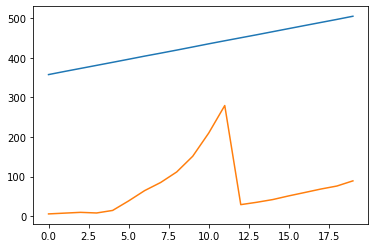

In [ ]:
df = pd.DataFrame(index=wave_length_and_tau.keys(), data=wave_length_and_tau.values(), columns=['Tau'])
df.reset_index(level=0, inplace=True)
df.rename(columns={'index':'Lambda'}, inplace=True)
plt.plot(df)

In [ ]:
df

,Lambda,Tau
0,357.899994,5.642657
1,365.799988,7.655121
2,373.500000,9.593727
3,381.200012,8.014671
4,388.899994,14.430326
5,396.700012,38.544827
6,404.600006,64.597816
7,412.100006,85.134026
8,419.799988,111.697021
9,427.700012,151.392349


In [ ]:
df_calibration_full = pd.read_csv('calibration.dat', sep=' ')

In [ ]:
df_calibration_full

,Lambda,Tau,Angle
0,308.799988,2.918390,1.8
1,309.399994,2.901556,3.6
2,310.200012,2.873998,5.4
3,310.899994,2.839333,7.2
4,311.700012,2.801924,9.0
...,...,...,...
761,896.900024,541.246460,1371.6
762,897.599976,542.062744,1373.4
763,898.500000,542.904724,1375.2
764,899.299988,543.737244,1377.0


In [ ]:
df_calibration = pd.DataFrame(df['Lambda'])

In [ ]:
from scipy import interpolate
f = interpolate.interp1d(df_calibration_full['Lambda'], df_calibration_full['Tau'])
df_calibration['Tau'] = f(df_calibration['Lambda'])

Вот так выглядит итоговый график для коэффициента пропускания для квантовых точек.

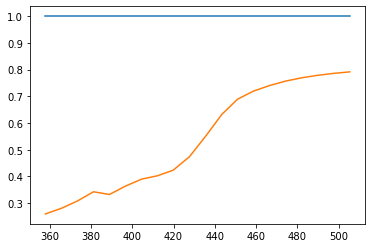

In [ ]:
plt.plot(df['Lambda'], df.div(df_calibration))